In [123]:
import pandas as pd
df=pd.read_csv('agr_en_train.csv', names=['Text','label'])

In [124]:
print(df.iloc[0])

Text     Well said sonu..you have courage to stand agai...
label                                                  OAG
Name: facebook_corpus_msr_1723796, dtype: object


In [125]:
df['labels_factor'] = pd.factorize(df.label)[0]

In [126]:
df

,Text,label,labels_factor
facebook_corpus_msr_1723796,Well said sonu..you have courage to stand agai...,OAG,0
facebook_corpus_msr_466073,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG,1
facebook_corpus_msr_1493901,"Now question is, Pakistan will adhere to this?",OAG,0
facebook_corpus_msr_405512,Pakistan is comprised of fake muslims who does...,OAG,0
facebook_corpus_msr_1521685,"??we r against cow slaughter,so of course it w...",NAG,1
facebook_corpus_msr_462570,Wondering why Educated Ambassador is strugglin...,CAG,2
facebook_corpus_msr_465051,How does inflation react to all the after shoc...,NAG,1
facebook_corpus_msr_450994,Not good job.....this guis creating a problem ...,CAG,2
facebook_corpus_msr_326287,This is a false news Indian media is simply mi...,NAG,1
facebook_corpus_msr_430450,"no permanent foes, no permanent friends. inter...",NAG,1


In [127]:
text = df['Text'].values
labels = df['labels_factor'].values

In [128]:
labels

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [129]:
from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, labels, test_size=0.20)

In [130]:
from keras.preprocessing.text import Tokenizer

In [131]:
tokenizer = Tokenizer(num_words=2000)

In [132]:
tokenizer

In [133]:
tokenizer.fit_on_texts(text_train)

In [134]:
X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

In [135]:
vocab_size = len(tokenizer.word_index)

In [136]:
print(text_train[0])
print(X_train[0])
vocab_size

1.36L is going to b a good position compared to Bullet less than 400CC. Eicher motor gone case now.
[136, 4, 172, 2, 351, 7, 65, 1031, 1279, 2, 1988, 503, 94, 609, 418, 54]


20676

In [137]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [138]:
X_train

array([[ 136,    4,  172, ...,    0,    0,    0],
       [  79, 1342,  202, ...,  389,    1,  751],
       [ 205,    4,    6, ...,    0,    0,    0],
       ...,
       [  57,  112,  956, ...,    0,    0,    0],
       [ 124,  305,  379, ...,    0,    0,    0],
       [  14,  282,   74, ...,    0,    0,    0]])

In [150]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen)) #https://keras.io/layers/embeddings/ 
model.add(layers.Conv1D(128, 5, activation='relu')) #https://keras.io/layers/convolutional/
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 50, 50)            1033800   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 46, 128)           32128     
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 1,067,229
Trainable params: 1,067,229
Non-trainable params: 0
_________________________________________________________________


In [151]:
#from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
#encoder = LabelEncoder()
#encoder.fit(y_train)
#encoded_y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_y)

In [152]:
#dummy_y

In [153]:
training = model.fit(X_train, y_train, epochs=10, verbose=False, validation_data=(X_test, y_test), batch_size=10)

In [143]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.4395
Testing Accuracy:  0.4271


In [144]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(training):
    acc = training.history['acc']
    val_acc = training.history['val_acc']
    loss = training.history['loss']
    val_loss = training.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 2)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

C:\Users\44740\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


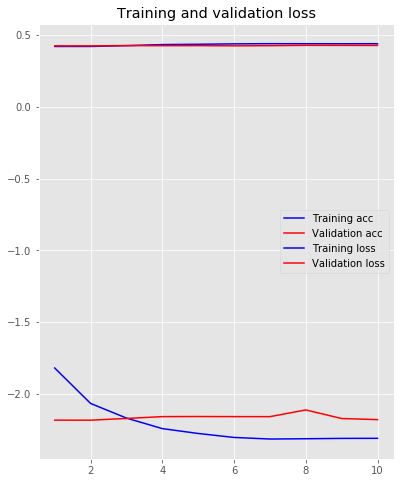

In [145]:
plot_history(training)